In [1]:
#import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
data = pd.read_csv("../DATA/student-por.csv")

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data.loc[data["school"]=="GP","school"]=0
data.loc[data["school"]=="MS","school"]=1
data.loc[data["sex"]=="M","sex"]=1
data.loc[data["sex"]=="F","sex"]=0
data.loc[data["address"]=="U","address"]=1
data.loc[data["address"]=="R","address"]=0
data.loc[data["famsize"]=="GT3","famsize"]=1
data.loc[data["famsize"]=="LE3","famsize"]=0
data.loc[data["Pstatus"]=="A","Pstatus"]=0
data.loc[data["Pstatus"]=="T","Pstatus"]=1
data.loc[data["Mjob"]=="teacher","Mjob"]=0
data.loc[data["Mjob"]=="health","Mjob"]=1
data.loc[data["Mjob"]=="services","Mjob"]=2
data.loc[data["Mjob"]=="at_home","Mjob"]=3
data.loc[data["Mjob"]=="other","Mjob"]=4
data.loc[data["Fjob"]=="teacher","Fjob"]=0
data.loc[data["Fjob"]=="health","Fjob"]=1
data.loc[data["Fjob"]=="services","Fjob"]=2
data.loc[data["Fjob"]=="at_home","Fjob"]=3
data.loc[data["Fjob"]=="other","Fjob"]=4
data.loc[data["reason"]=="home","reason"]=0
data.loc[data["reason"]=="reputation","reason"]=1
data.loc[data["reason"]=="course","reason"]=2
data.loc[data["reason"]=="other","reason"]=3
data.loc[data["guardian"]=="mother","guardian"]=0
data.loc[data["guardian"]=="father","guardian"]=1
data.loc[data["guardian"]=="other","guardian"]=2
data.loc[data["schoolsup"]=="yes","schoolsup"]=1
data.loc[data["schoolsup"]=="no","schoolsup"]=0
data.loc[data["famsup"]=="yes","famsup"]=1
data.loc[data["famsup"]=="no","famsup"]=0
data.loc[data["paid"]=="yes","paid"]=1
data.loc[data["paid"]=="no","paid"]=0
data.loc[data["activities"]=="yes","activities"]=1
data.loc[data["activities"]=="no","activities"]=0
data.loc[data["nursery"]=="yes","nursery"]=1
data.loc[data["nursery"]=="no","nursery"]=0
data.loc[data["higher"]=="yes","higher"]=1
data.loc[data["higher"]=="no","higher"]=0
data.loc[data["internet"]=="yes","internet"]=1
data.loc[data["internet"]=="no","internet"]=0
data.loc[data["romantic"]=="yes","romantic"]=1
data.loc[data["romantic"]=="no","romantic"]=0


if 'new' not in data:
    data.insert(33,'new',0)

for i in range(0,len(data)):
    data.loc[data['G3'] <= 7, 'new'] = 0
    #data.loc[(data['G3']>7) & (data['G3']<=14) , 'new'] = 1
    data.loc[data['G3'] >7, 'new'] = 1

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,new
0,0,0,18,1,1,0,4,4,3,0,...,3,4,1,1,3,4,0,11,11,1
1,0,0,17,1,1,1,1,1,3,4,...,3,3,1,1,3,2,9,11,11,1
2,0,0,15,1,0,1,1,1,3,4,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,1,1,4,2,1,2,...,2,2,1,1,5,0,14,14,14,1
4,0,0,16,1,1,1,3,3,4,4,...,3,2,1,2,5,0,11,13,13,1


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set(style='whitegrid',context='notebook')

In [7]:
cols=['absences','G1','G2','G3','new']

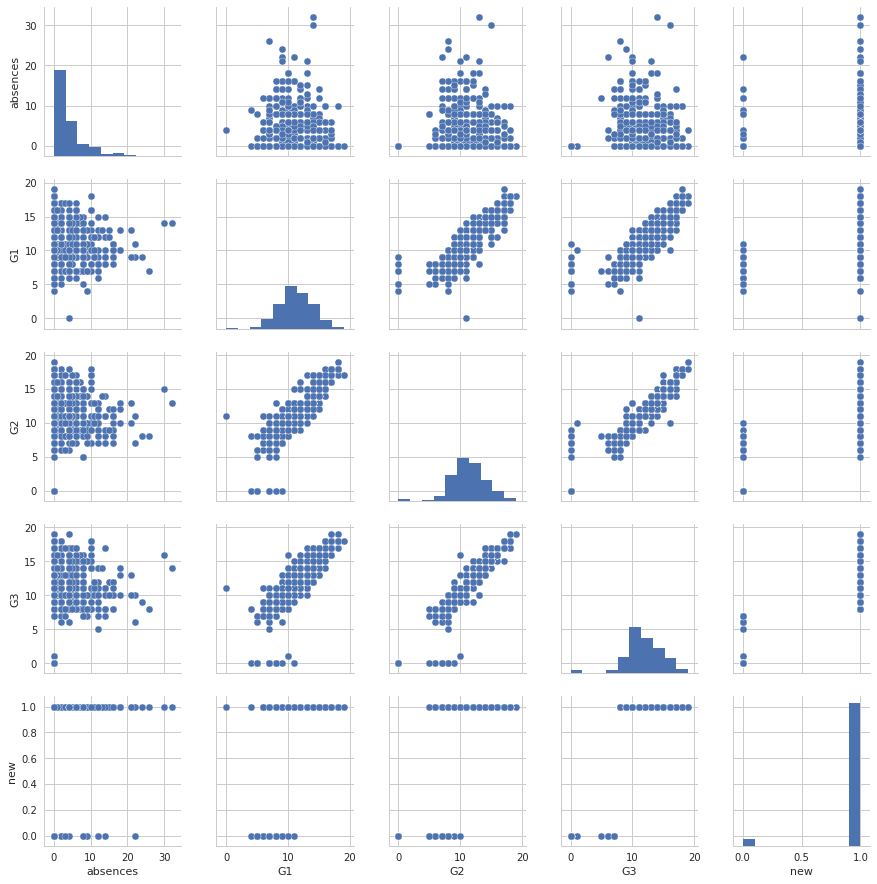

In [8]:
sns.pairplot(data[cols],size=2.5)
plt.show()

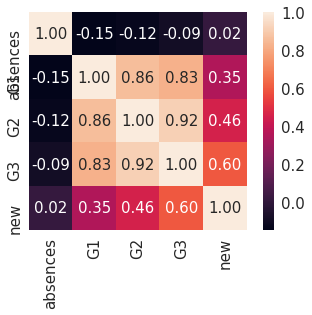

In [9]:
import numpy as np
cm=np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
               annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [10]:
class LinearRegressionGD(object):
    
    def __init__(self,eta=0.001, n_iter=100):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)
    

X = data[['absences']].values
y = data['G3'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


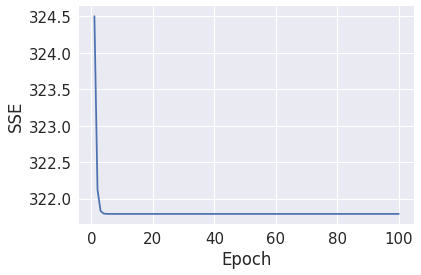

In [11]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [12]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

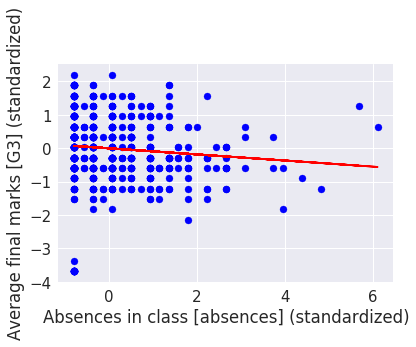

In [13]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Absences in class [absences] (standardized)')
plt.ylabel('Average final marks [G3] (standardized)')
plt.show()

In [14]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -0.091
Intercept: -0.000


Slope: -0.064
Intercept: 12.139


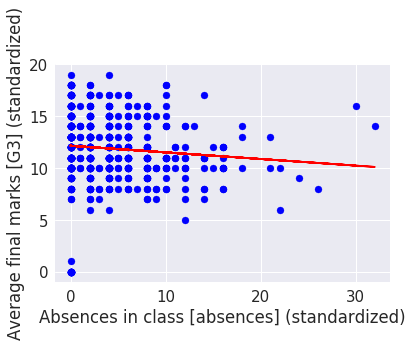

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x7ff72812fbf8>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [15]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
lin_regplot(X, y, slr)
plt.xlabel('Absences in class [absences] (standardized)')
plt.ylabel('Average final marks [G3] (standardized)')
plt.show()

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,
residual_metric=lambda x: np.sum(np.abs(x), axis=1),residual_threshold=5.0,random_state=0)
ransac.fit(X, y)

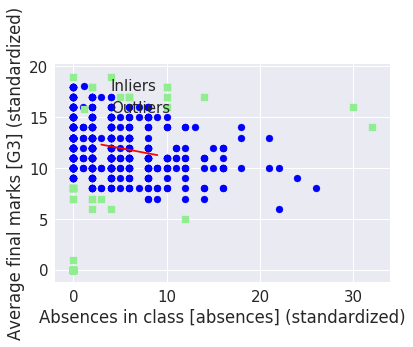

In [16]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Absences in class [absences] (standardized)')
plt.ylabel('Average final marks [G3] (standardized)')
plt.legend(loc='upper left')
plt.show()

In [17]:
class LinearRegressionGD(object):
    
    def __init__(self,eta=0.001, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)
    

X = data[['G1']].values
y = data['G2'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


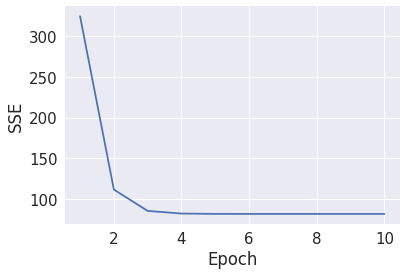

In [18]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [19]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

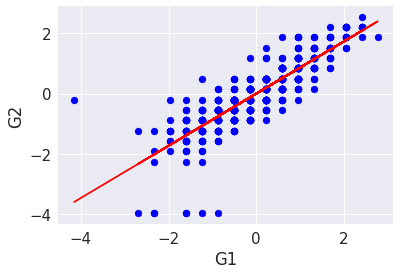

In [20]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

In [21]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.865
Intercept: -0.000


Slope: 0.918
Intercept: 1.105


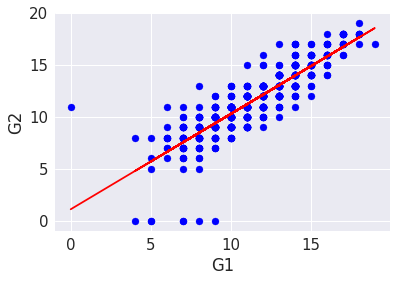

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x7ff728508488>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [22]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
lin_regplot(X, y, slr)
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,
residual_metric=lambda x: np.sum(np.abs(x), axis=1),residual_threshold=5.0,random_state=0)
ransac.fit(X, y)

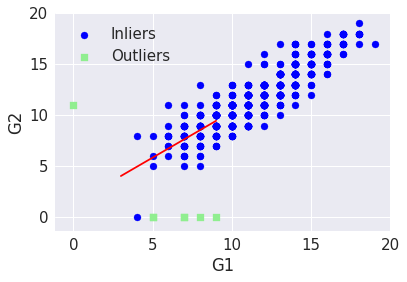

In [23]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('G1')
plt.ylabel('G2')
plt.legend(loc='upper left')
plt.show()

In [24]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 0.901
Intercept: 1.357
